**Marta Amores**

#Práctica 2#


Debemos crear un modelo de Red de Neuronas Convolucionales, estas capas nos ayudarán al mejor reconocimiento de imágenes, para que nuestro modelo sea capaz de reconocer y clasificar imágenes. 
Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  


Para entender mejor que son las redes convolucionales, sabemos que soy muy similares a las densamente conectadas (Dense), estas tienen pesos y sesgos y son capaces de aprender. 
La diferencia es que las redes convolucionales suponen que las entradas son imágenes, esto hace que podamos identificar diferentes propiedades de las imágenes, más allá de las Dense. 
Lo que realmente hacen las capas convolucionales es, antes de saber que es una boca o un ojo, saber identificar las líneas, texturas o formas, que sean similares a ellas. Después aprender la disposición de estos, es decir, una boca siempre va a estar debajo de la nariz, finalmente ya aprenderá lo que es una boca o un ojo. 



In [7]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


Comprobamos que nuestra versión es posterior a 2.0.0

Crgamos todas las librerías necesarías para poder entrenar nuestro modelo.
Nos aseguramos que tenemos los datos en la forma que necesitamos. 

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

assert train_images.shape==(60000,28,28)
assert test_images.shape==(10000,28,28)
assert train_labels.shape==(60000,)
assert test_labels.shape==(10000,)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
test_labels=test_labels.reshape((10000,1))
train_labels=train_labels.reshape((60000,1))



4422102/4422102 [==============================] - 0s 0us/step


Comprobamos que los datos tienen la forma esperada.


#Definición de los modelos

En todos los casos vamos a utilizar capas convolucionales, como hemos comentado en la introducción, estas capas se definen como **clasificadoras de imágenes**, optimizan el reconocimiento de las imágenes. 
Las capas de las CNNs, son neuronas especializadas en la operación de convolución, esta capa aprende patrones a niveles **locales**, y luego de una manera más **global**, a diferencia con las capas Dense que estas aprendían patrones globales. 

La convolución, puede explicarse como: primero, aprenden líneas, aristas, etc. Una vez aprendido esto, puede reconocer un punto de la imágen en cualquier parte, es decir, la dispersión, y patrones de elementos básicos, hasta llegar a unos patrones más complejos. 

Otra operación de las capas CNNs, es la operación de pooling, esta simplifica el resultado de la capa convolucional y crea una versión condensada, se suelen aplicar después de las capas convolucionales.

##Caso 1##

El primer caso va a utilizar dos capas convolucionales, una de 32 filtros y otra de 64, el tamaño de la ventana en ambas es de 5x5, y las dos capas utilizan una función de activación 'relu'. Seguidamente de dos capas pooling, de tamaño 2x2. 

Finalmente una capa Flatten para aplanar y poder pasarla a la última capa Dense, con 10 neuronas y una función de activación 'softmax'.

In [22]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64,(5,5), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

print("CASO 1 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model1.summary()



CASO 1 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 

TAMAÑO DE LA CAPA POOLING: 2x2 

FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                     

Nuestra función **summary** de nuestro CASO 1 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((5x5)+1)x32=832 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 24/2=12
*   La segunda capa convolucional es, (((5x5)x32)+1)x64=51264 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 8/2=4
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La última capa dense es, (((1024)x10))+10)=10250 parámetros.

En total de los parámetros que hemos encontrado es:  62.346

In [23]:
model1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

Entrenamos nuestro modelo con 5 épocas.

In [24]:
 historia1=model1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 2s 4ms/step - loss: 1.3342 - accuracy: 0.5634 - val_loss: 0.7718 - val_accuracy: 0.7316
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.7294 - accuracy: 0.7338 - val_loss: 0.6489 - val_accuracy: 0.7641
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.6255 - accuracy: 0.7728 - val_loss: 0.5789 - val_accuracy: 0.7932
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.5689 - accuracy: 0.7952 - val_loss: 0.5448 - val_accuracy: 0.8000
Epoch 5/5
480/480 [==============================] - 2s 4ms/step - loss: 0.5300 - accuracy: 0.8083 - val_loss: 0.5178 - val_accuracy: 0.8098


In [25]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [26]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

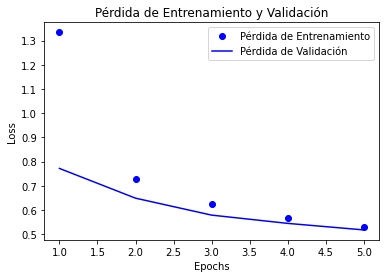

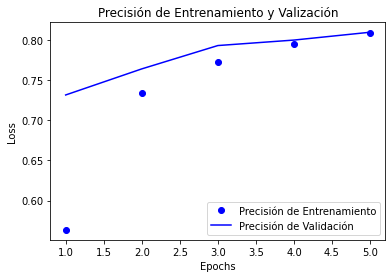

In [27]:
pinta_perdida_entrenamiento_validacion(historia1)
pinta_precision_entrenamiento_validacion(historia1)


#Caso 2

En el segundo caso va a utilizar dos capas convolucionales, una de 64 filtros y otra de 128, el tamaño de la ventana de la primera capa es de 7x7, y el de la segunda de 3x3, y las dos capas utilizan una función de activación 'relu'. Seguidamente de dos capas pooling, de tamaño 2x2.

Finalmente una capa Flatten para aplanar y poder pasarla a la penúltima capa Dense, con 65 neuronas y una función de activación 'relu', y por último la última capa que también es Dense, con 10 neuronas y una función de activación 'softmax'.

In [28]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(65, activation='relu'))
model2.add(Dense(10, activation='softmax'))

print("CASO 2 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print('CAPA PADDING: same \n')
print('TAMAÑO ÚLTIMA CAPA DENSE: 65 \n')
print("FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model2.summary()

CASO 2 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 

TAMAÑO DE LA CAPA POOLING: 2x2 

CAPA PADDING: same 

TAMAÑO ÚLTIMA CAPA DENSE: 65 

FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                           

Nuestra función **summary** de nuestro CASO 2 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((7x7)+1)x64=3200 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 28/2=14
*   La segunda capa convolucional es, (((3x3)x64)+1)x128=73856 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 14/2=7
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La penúltima capa dense es, (((6272)x65))+65)=407745 parámetros.
*   La última capa dense es, (65x10)+10=660

En total de los parámetros que hemos encontrado es:  485.461

In [29]:
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [30]:
 historia2=model2.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 4s 7ms/step - loss: 1.1964 - accuracy: 0.6118 - val_loss: 0.7287 - val_accuracy: 0.7400
Epoch 2/5
480/480 [==============================] - 5s 11ms/step - loss: 0.6940 - accuracy: 0.7500 - val_loss: 0.6091 - val_accuracy: 0.7762
Epoch 3/5
480/480 [==============================] - 3s 7ms/step - loss: 0.6076 - accuracy: 0.7779 - val_loss: 0.5567 - val_accuracy: 0.7956
Epoch 4/5
480/480 [==============================] - 4s 8ms/step - loss: 0.5543 - accuracy: 0.7987 - val_loss: 0.5437 - val_accuracy: 0.7940
Epoch 5/5
480/480 [==============================] - 3s 7ms/step - loss: 0.5144 - accuracy: 0.8130 - val_loss: 0.5036 - val_accuracy: 0.8164


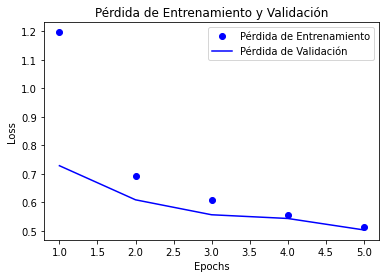

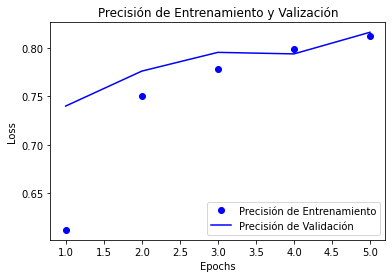

In [31]:
pinta_perdida_entrenamiento_validacion(historia2)
pinta_precision_entrenamiento_validacion(historia2)

#Caso 3

En el tercer caso va a utilizar dos capas convolucionales, una de 64 filtros y otra de 128, el tamaño de la ventana de la primera capa es de 7x7, y el de la segunda de 3x3, y las dos capas utilizan una función de activación 'relu'. Seguidamente de dos capas pooling, de tamaño 2x2.
Finalmente una capa Flatten para aplanar y poder pasarla a la penúltima capa Dense, con 65 neuronas y una función de activación 'relu', y por último la última capa que también es Dense, con 10 neuronas y una función de activación 'softmax'.

La diferencia ante el segundo caso, en este caso vamos a utilizar un optimizador diferente al que estábamos utilizando, en este caso el optimizador 'Adam'. Como ya vimos en la última práctica, a veces, hace que el proceso de optimización converja mejor. 

In [32]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128,(3,3), padding = 'same', activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(65, activation='relu'))
model3.add(Dense(10, activation='softmax'))

print("CASO 3 \n")
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print('CAPA PADDING: same \n')
print('TAMAÑO ÚLTIMA CAPA DENSE: 65 \n')
print("FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: adam \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model3.summary()

CASO 3 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 7x7 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 128 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 3x3 

TAMAÑO DE LA CAPA POOLING: 2x2 

CAPA PADDING: same 

TAMAÑO ÚLTIMA CAPA DENSE: 65 

FUNCIÓN ACTIVACIÓN EN LAS TRES CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: adam 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                          

Nuestra función **summary** de nuestro CASO 3 nos indica:
El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
*   La primera capa convolucional es, ((7x7)+1)x64=3200 parámetros.
*   La primera capa pooling no suma parámetros porque no aprende, 28/2=14
*   La segunda capa convolucional es, (((3x3)x64)+1)x128=73856 parámetros.
*   La segunda capa pooling no suma parámetros porque no aprende, 14/2=7
*   La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
*   La penúltima capa dense es, (((6272)x65))+65)=407745 parámetros.
*   La última capa dense es, (65x10)+10=660
En total de los parámetros que hemos encontrado es:  485.461

In [33]:
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics='accuracy')

In [34]:
 historia3= model3.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 4s 8ms/step - loss: 0.5034 - accuracy: 0.8208 - val_loss: 0.3656 - val_accuracy: 0.8684
Epoch 2/5
480/480 [==============================] - 3s 7ms/step - loss: 0.3174 - accuracy: 0.8862 - val_loss: 0.2906 - val_accuracy: 0.8940
Epoch 3/5
480/480 [==============================] - 3s 7ms/step - loss: 0.2724 - accuracy: 0.9003 - val_loss: 0.2692 - val_accuracy: 0.9027
Epoch 4/5
480/480 [==============================] - 3s 7ms/step - loss: 0.2455 - accuracy: 0.9107 - val_loss: 0.2630 - val_accuracy: 0.9062
Epoch 5/5
480/480 [==============================] - 4s 8ms/step - loss: 0.2194 - accuracy: 0.9192 - val_loss: 0.2515 - val_accuracy: 0.9080


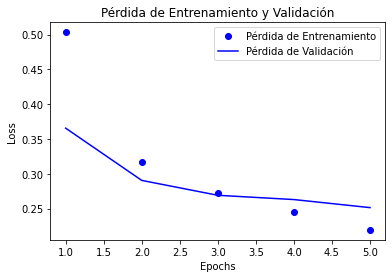

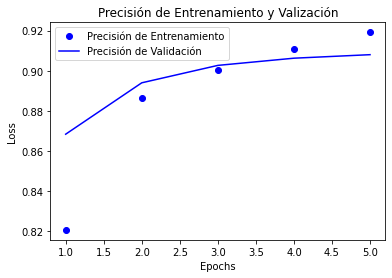

In [35]:
pinta_perdida_entrenamiento_validacion(historia3)
pinta_precision_entrenamiento_validacion(historia3)

#Caso 4



En este caso, utilizaremos el **mismo modelo** que el CASO 1, con la diferencia que lo entrenaremos 25 épocas.

Entonces vamos a utilizar dos capas convolucionales, una de 32 filtros y otra de 64, el tamaño de la ventana en ambas es de 5x5, y las dos capas utilizan una función de activación 'relu'. Seguidamente de dos capas pooling, de tamaño 2x2. 

Finalmente una capa Flatten para aplanar y poder pasarla a la última capa Dense, con 10 neuronas y una función de activación 'softmax'.

In [36]:
model_1 = Sequential()
model_1.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64,(5,5), activation='relu'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(10, activation= 'softmax'))


print('CASO 1 (25 épocas de entrenamiento) \n')
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')

model_1.summary()


CASO 1 (25 épocas de entrenamiento) 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 

TAMAÑO DE LA CAPA POOLING: 2x2 

FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: relu 
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                        

Nuestra función summary de nuestro CASO 1 nos indica: El input shape es (28x28) por la altura y la anchura, 1 porque la imágen es monocromática.
La primera capa convolucional es, ((5x5)+1)x32=832 parámetros.
La primera capa pooling no suma parámetros porque no aprende, 24/2=12
La segunda capa convolucional es, (((5x5)x32)+1)x64=51264 parámetros.
La segunda capa pooling no suma parámetros porque no aprende, 8/2=4
La capa flatten tampoco suma parámetros porque no aprende, solo nos aplana los datos para pasárselos a la capa Dense.
La última capa dense es, (((1024)x10))+10)=10250 parámetros.

En total de los parámetros que hemos encontrado es: 62.346

In [37]:
model_1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [38]:
historia4=model_1.fit(train_images, train_labels,
          batch_size=100,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 2s 4ms/step - loss: 1.3337 - accuracy: 0.5748 - val_loss: 0.7614 - val_accuracy: 0.7318
Epoch 2/25
480/480 [==============================] - 2s 4ms/step - loss: 0.7127 - accuracy: 0.7415 - val_loss: 0.6481 - val_accuracy: 0.7599
Epoch 3/25
480/480 [==============================] - 2s 4ms/step - loss: 0.6226 - accuracy: 0.7733 - val_loss: 0.5854 - val_accuracy: 0.7872
Epoch 4/25
480/480 [==============================] - 2s 4ms/step - loss: 0.5691 - accuracy: 0.7925 - val_loss: 0.5418 - val_accuracy: 0.8043
Epoch 5/25
480/480 [==============================] - 2s 4ms/step - loss: 0.5313 - accuracy: 0.8091 - val_loss: 0.5102 - val_accuracy: 0.8195
Epoch 6/25
480/480 [==============================] - 2s 4ms/step - loss: 0.5001 - accuracy: 0.8211 - val_loss: 0.4884 - val_accuracy: 0.8265
Epoch 7/25
480/480 [==============================] - 2s 4ms/step - loss: 0.4761 - accuracy: 0.8298 - val_loss: 0.4760 - val_accuracy: 0.8288
Epoch 

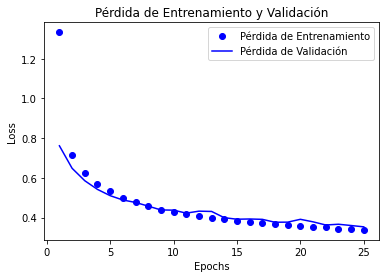

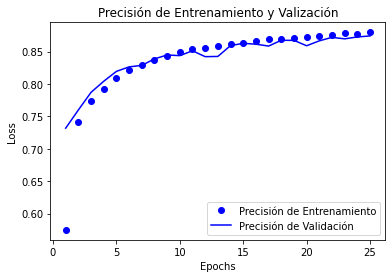

In [39]:
pinta_perdida_entrenamiento_validacion(historia4)
pinta_precision_entrenamiento_validacion(historia4)

# Caso 5



En este caso, utilizaremos un modelo parecido al CASO 1, con la diferencia de cambiar la función de activación de las capas convolucionales. 

Entonces vamos a utilizar dos capas convolucionales, una de 32 filtros y otra de 64, el tamaño de la ventana en ambas es de 5x5, y las dos capas utilizan una función de activación **'tanh'**. Seguidamente de dos capas pooling, de tamaño 2x2. 

Finalmente una capa Flatten para aplanar y poder pasarla a la última capa Dense, con 10 neuronas y una función de activación 'softmax'.

In [40]:
model__1 = Sequential()
model__1.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Conv2D(64,(5,5), activation='tanh'))
model__1.add(MaxPooling2D((2, 2)))
model__1.add(Flatten())
model__1.add(Dense(10,activation='softmax'))


print('CASO 1 (función de activación tanh) \n')
print("--------------------------------- \n")
print("NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 \n ")
print('TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 \n')
print("NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 \n ")
print('TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 \n')
print('TAMAÑO DE LA CAPA POOLING: 2x2 \n')
print("FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: tanh  \n  ",)
print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax \n ")
print("OPTIMIZADOR: sgd \n ")
print("FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy \n")
print("MÉTRICA: accuracy ")
print('--------------------------------- \n')
model__1.summary()


CASO 1 (función de activación tanh) 

--------------------------------- 

NÚMERO DE FILTROS EN LA PRIMERA CAPA CONVOLUCIONAL: 32 
 
TAMAÑO DE LA VENTANA EN LA PRIMERA CAPA CONVOLUCIONAL: 5x5 

NÚMERO DE FILTROS EN LA SEGUNDA CAPA CONVOLUCIONAL: 64 
 
TAMAÑO DE LA VENTANA EN LA SEGUNDA CAPA CONVOLUCIONAL: 5x5 

TAMAÑO DE LA CAPA POOLING: 2x2 

FUNCIÓN ACTIVACIÓN EN AMBAS CAPAS: tanh  
  
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax 
 
OPTIMIZADOR: sgd 
 
FUNCIÓN PÉRDIDA: sparse_categorical_crossentropy 

MÉTRICA: accuracy 
--------------------------------- 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                       

In [41]:
model__1.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd',
              metrics='accuracy')

In [42]:
 historia5= model__1.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
480/480 [==============================] - 2s 4ms/step - loss: 1.2377 - accuracy: 0.6093 - val_loss: 0.7828 - val_accuracy: 0.7322
Epoch 2/5
480/480 [==============================] - 2s 4ms/step - loss: 0.7183 - accuracy: 0.7414 - val_loss: 0.6511 - val_accuracy: 0.7630
Epoch 3/5
480/480 [==============================] - 2s 4ms/step - loss: 0.6268 - accuracy: 0.7705 - val_loss: 0.5932 - val_accuracy: 0.7813
Epoch 4/5
480/480 [==============================] - 2s 4ms/step - loss: 0.5734 - accuracy: 0.7924 - val_loss: 0.5460 - val_accuracy: 0.7997
Epoch 5/5
480/480 [==============================] - 2s 4ms/step - loss: 0.5352 - accuracy: 0.8068 - val_loss: 0.5221 - val_accuracy: 0.8072


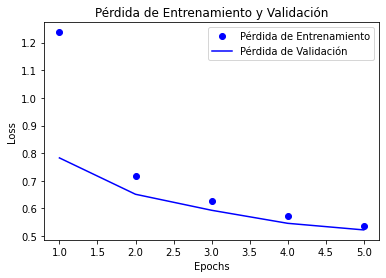

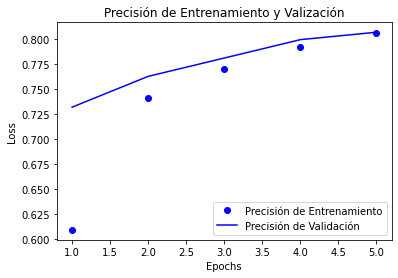

In [43]:
pinta_perdida_entrenamiento_validacion(historia5)
pinta_precision_entrenamiento_validacion(historia5)

# Análisis de los resultados

Antes de realizar las predicciones, podemos sacar conclusiones de los 5 primeros casos. 


El caso 1, llega a una precisión del 80%, aunque la pérdida no es muy baja, podemos decir que no es un mal modelo, porque al compararlo con el caso 4, que es el mismo modelo pero entrenándolo con 25 épocas, vemos como el valor de la perdida baja y permite llegar a la precisión al 87%. A diferencia con el caso 5, que también es igual que el caso 1, la única variación es la función de activación, son bastante parecidos ya que la pérdida no alcanza valores muy bajos y la precisión ronda en 80%.

Del caso 1 al caso 2, no notamos diferencias.

Entonces, podemos adelantar en un primer momento que el caso que mejor se comporta es el **caso 3**, y podemos indicar que lo hace gracias al optimizador 'adam'. Este caso baja la pérdida, (es el caso con la pérdida más baja), y con una precisión del 91%, es decir, la más alta. 



## ¿Como de bien se comportan?

In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [45]:
predictions = model1.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)
predictions4=model_1.predict(test_images)
predictions5=model__1.predict(test_images)
test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 1s 2ms/step


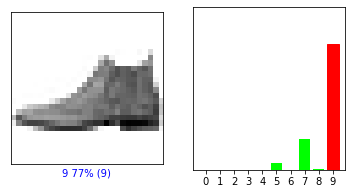

<Figure size 432x288 with 0 Axes>

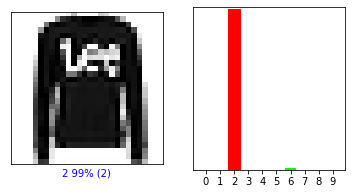

<Figure size 432x288 with 0 Axes>

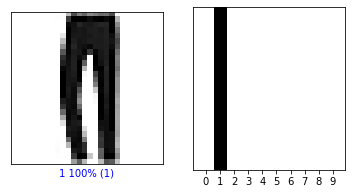

<Figure size 432x288 with 0 Axes>

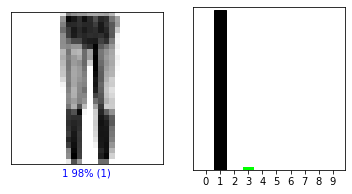

<Figure size 432x288 with 0 Axes>

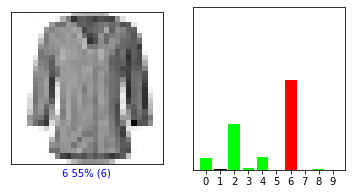

<Figure size 432x288 with 0 Axes>

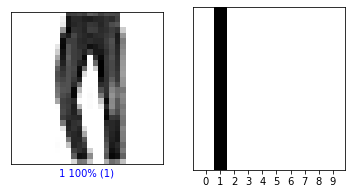

<Figure size 432x288 with 0 Axes>

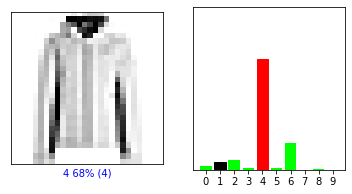

<Figure size 432x288 with 0 Axes>

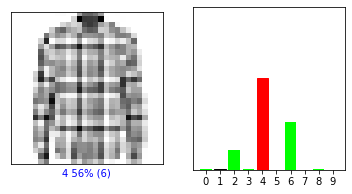

<Figure size 432x288 with 0 Axes>

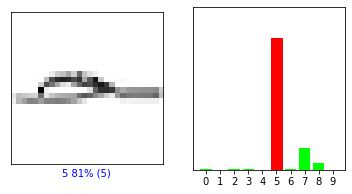

<Figure size 432x288 with 0 Axes>

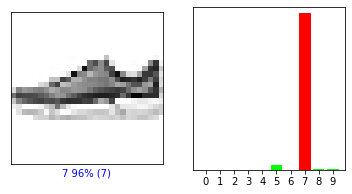

<Figure size 432x288 with 0 Axes>

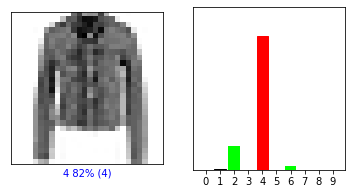

<Figure size 432x288 with 0 Axes>

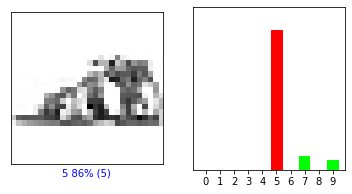

<Figure size 432x288 with 0 Axes>

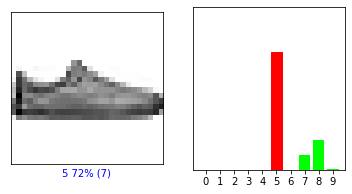

<Figure size 432x288 with 0 Axes>

In [46]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[i],  test_labels)
  plt.show()
  plt.clf()

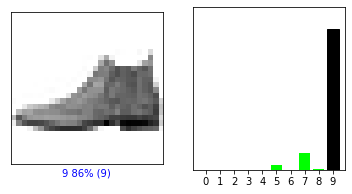

<Figure size 432x288 with 0 Axes>

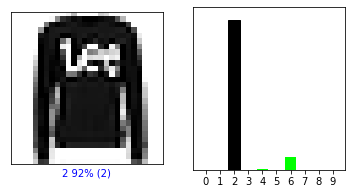

<Figure size 432x288 with 0 Axes>

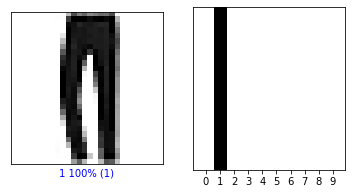

<Figure size 432x288 with 0 Axes>

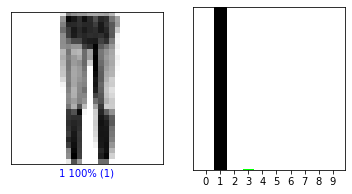

<Figure size 432x288 with 0 Axes>

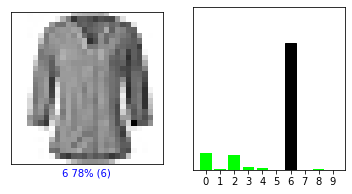

<Figure size 432x288 with 0 Axes>

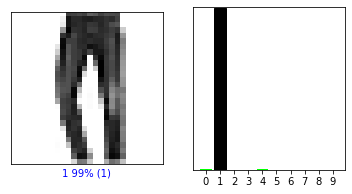

<Figure size 432x288 with 0 Axes>

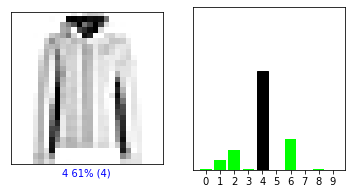

<Figure size 432x288 with 0 Axes>

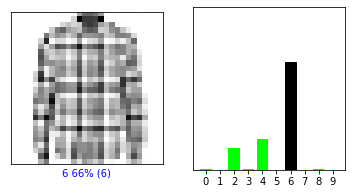

<Figure size 432x288 with 0 Axes>

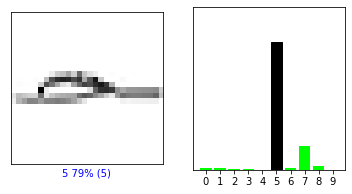

<Figure size 432x288 with 0 Axes>

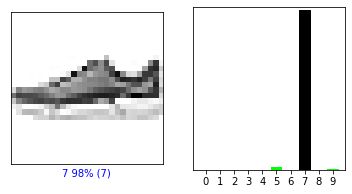

<Figure size 432x288 with 0 Axes>

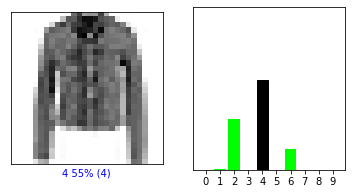

<Figure size 432x288 with 0 Axes>

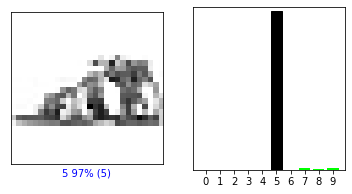

<Figure size 432x288 with 0 Axes>

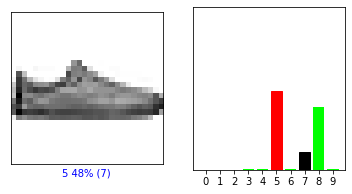

<Figure size 432x288 with 0 Axes>

In [47]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions2[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions2[i],  test_labels)
  plt.show()
  plt.clf()

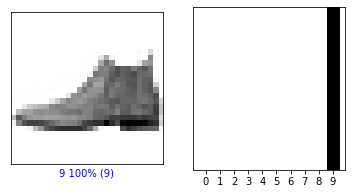

<Figure size 432x288 with 0 Axes>

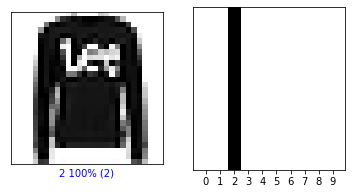

<Figure size 432x288 with 0 Axes>

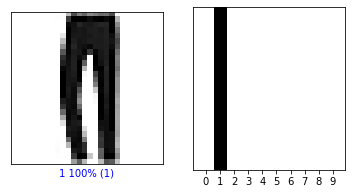

<Figure size 432x288 with 0 Axes>

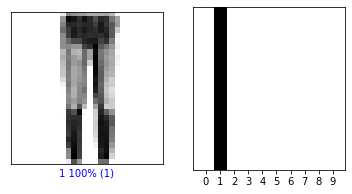

<Figure size 432x288 with 0 Axes>

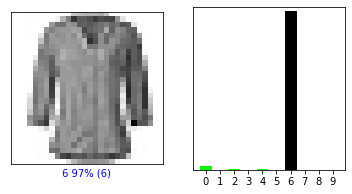

<Figure size 432x288 with 0 Axes>

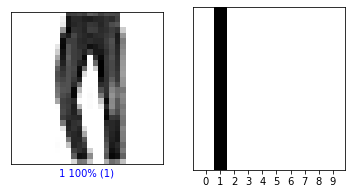

<Figure size 432x288 with 0 Axes>

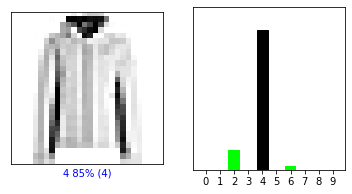

<Figure size 432x288 with 0 Axes>

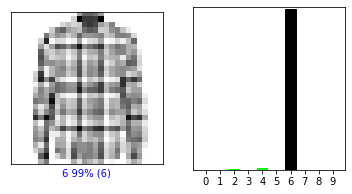

<Figure size 432x288 with 0 Axes>

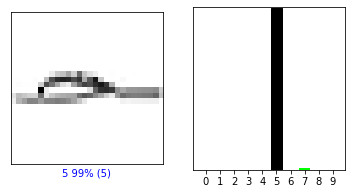

<Figure size 432x288 with 0 Axes>

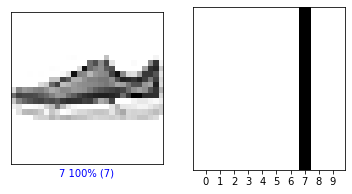

<Figure size 432x288 with 0 Axes>

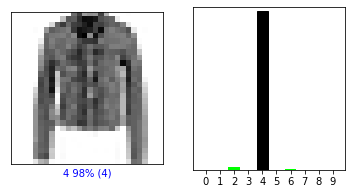

<Figure size 432x288 with 0 Axes>

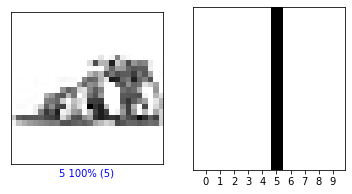

<Figure size 432x288 with 0 Axes>

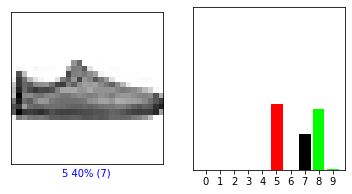

<Figure size 432x288 with 0 Axes>

In [48]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions3[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions3[i],  test_labels)
  plt.show()
  plt.clf()

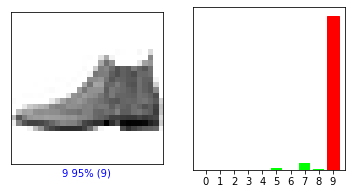

<Figure size 432x288 with 0 Axes>

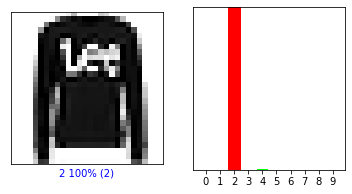

<Figure size 432x288 with 0 Axes>

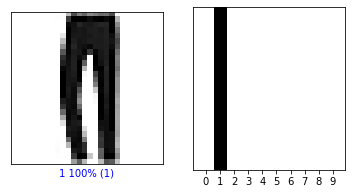

<Figure size 432x288 with 0 Axes>

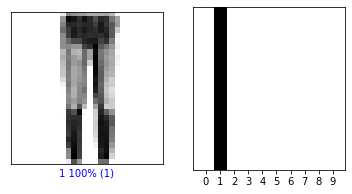

<Figure size 432x288 with 0 Axes>

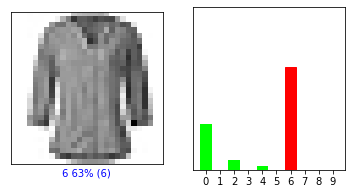

<Figure size 432x288 with 0 Axes>

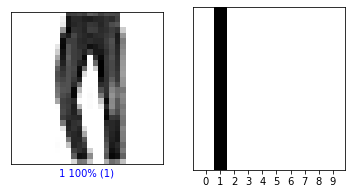

<Figure size 432x288 with 0 Axes>

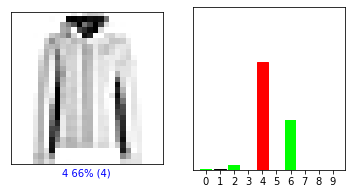

<Figure size 432x288 with 0 Axes>

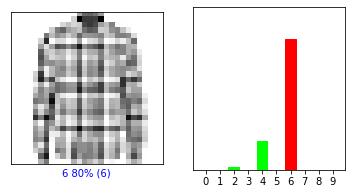

<Figure size 432x288 with 0 Axes>

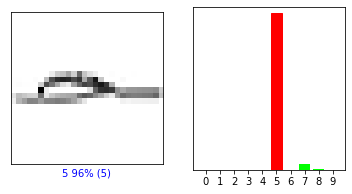

<Figure size 432x288 with 0 Axes>

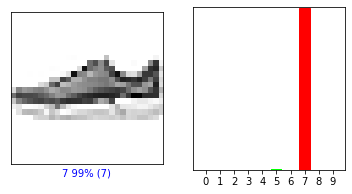

<Figure size 432x288 with 0 Axes>

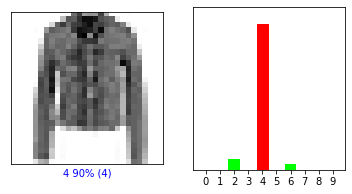

<Figure size 432x288 with 0 Axes>

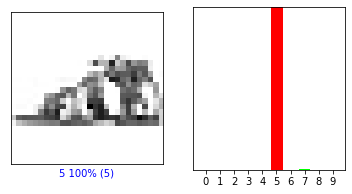

<Figure size 432x288 with 0 Axes>

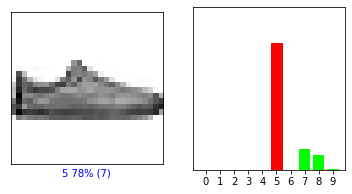

<Figure size 432x288 with 0 Axes>

In [49]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions4[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions4[i],  test_labels)
  plt.show()
  plt.clf()

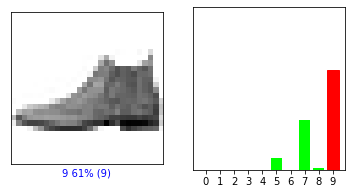

<Figure size 432x288 with 0 Axes>

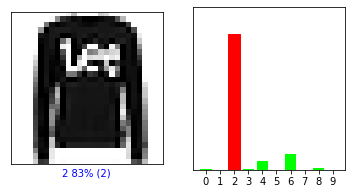

<Figure size 432x288 with 0 Axes>

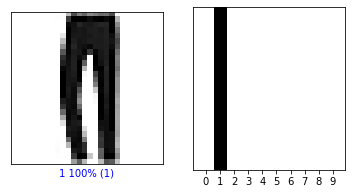

<Figure size 432x288 with 0 Axes>

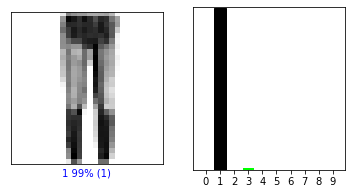

<Figure size 432x288 with 0 Axes>

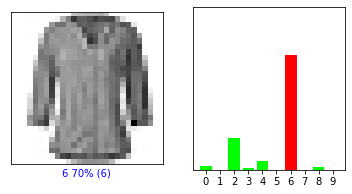

<Figure size 432x288 with 0 Axes>

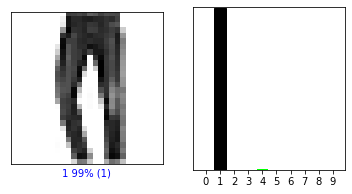

<Figure size 432x288 with 0 Axes>

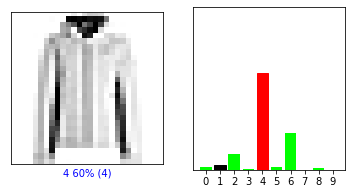

<Figure size 432x288 with 0 Axes>

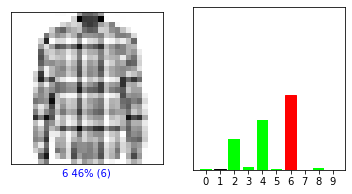

<Figure size 432x288 with 0 Axes>

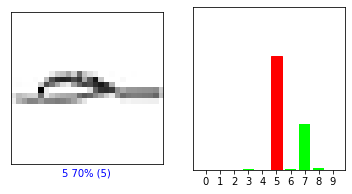

<Figure size 432x288 with 0 Axes>

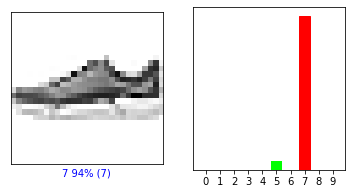

<Figure size 432x288 with 0 Axes>

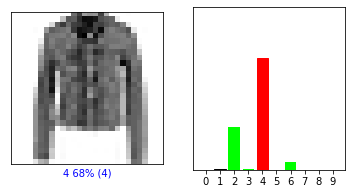

<Figure size 432x288 with 0 Axes>

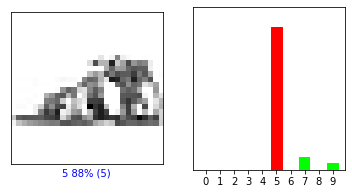

<Figure size 432x288 with 0 Axes>

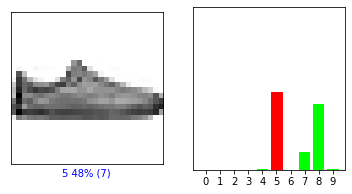

<Figure size 432x288 with 0 Axes>

In [50]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions5[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions5[i],  test_labels)
  plt.show()
  plt.clf()

Después de ver las predicciones, podemos decir, evidentemente que el tercer caso es el caso más eficaz de los anteriores, seguidamente por el caso uno entrenado con 25 épocas. 

Vemos también que en el tercer caso la imágen de la zapatilla no acaba de predecirla del todo bien , pero si comparamos con los otros casos estos tampoco llegan hacerlo, en el resto de las imágenes el tercer caso predice de una manera exacta, o casi exacta. 

Si hacemos la comparativa con las predicciones que obtuvimos en la **práctica 1**, cuando utilizábamos capas Dense, llegamos a la conclusión de que las capas convolucionales para este modelos funcionan mejor que las otras dos (las Dense), en ninguno de los casos hemos sobreentrenado a nuestro modelo, y se comporta de mejor manera frente a las otras. Lo que si que podemos decir es lo bien que funciona en este tipo de casos el optimizador 'adam', ya pudimos deducirlo en la práctica pasada y en el caso de esta el caso que mejor funciona es el que utiliza este optimizador. 

## Predicciones con la imágen 6


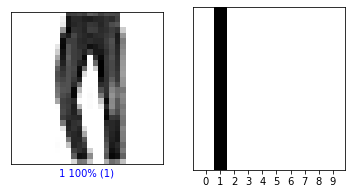

<Figure size 432x288 with 0 Axes>

In [51]:
for i in range(1):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions[5],  test_labels)
  plt.show()
  plt.clf()

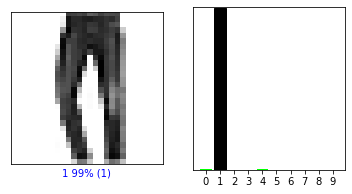

<Figure size 432x288 with 0 Axes>

In [52]:
for i in range(1):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions2[5],  test_labels)
  plt.show()
  plt.clf()

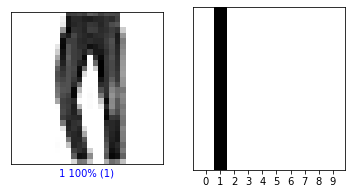

<Figure size 432x288 with 0 Axes>

In [53]:
for i in range(1):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions3[5],  test_labels)
  plt.show()
  plt.clf()

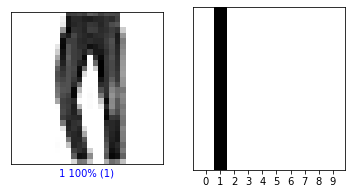

<Figure size 432x288 with 0 Axes>

In [54]:
for i in range(1):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions4[5],  test_labels)
  plt.show()
  plt.clf()

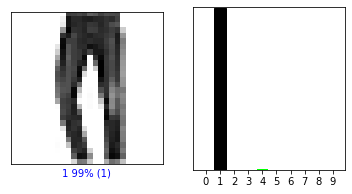

<Figure size 432x288 with 0 Axes>

In [55]:
for i in range(1):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(5, predictions5[5],  test_labels)
  plt.show()
  plt.clf()


Los 5 casos predicen muy bien esta imágen, tres de ellos la predicen al 100% y dos al 99%.

# Modelo con los conceptos batch_normalization y dropout 

El drop out consiste en poner a 0, **aleatoriamente** una serie de parámetros de la salida, durante el entrenamiento. Esto se hace para ganar generalidad.
Cuando se haga la validación, se debe de equilibrar los valores, es decir si hemos hecho un drop out de 0.5, reduciremos los valores un 50%, ya que esta técnica no se utiliza en la validación. 
El batch_normalization, es un método de normalización de los datos, para poder resolver un problema interno de covarianza (interno refiere a las capas ocultas).


Utilizaremos en primer caso para ver como funciona el modelo con estos casos.

In [56]:
from tensorflow.keras.layers import BatchNormalization, Activation

modelc = Sequential()
modelc.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1)))
modelc.add(BatchNormalization())
modelc.add(Activation('relu'))
modelc.add(Dropout(0.5))
modelc.add(BatchNormalization())
modelc.add(MaxPooling2D((2, 2)))

modelc.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1)))
modelc.add(BatchNormalization())
modelc.add(Activation('relu'))
modelc.add(Dropout(0.5))
modelc.add(MaxPooling2D((2, 2)))

modelc.add(Flatten())
modelc.add(Dense(10,'softmax'))


print('MODELO 6 \n')
modelc.summary()

MODELO 6 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12

In [57]:
modelc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
modelc.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = modelc.evaluate(test_images,  test_labels)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5069 - accuracy: 0.8206
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3600 - accuracy: 0.8706
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3208 - accuracy: 0.8838
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3020 - accuracy: 0.8906
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4178 - accuracy: 0.8726


Notamos diferencia frente al primer caso, pero podemos pensar que es por el optimizador 'adam', es evidente que es mejor modelo. 

¿Que pasaría si entrenamos con más épocas?

In [59]:
modelc.fit(train_images, train_labels, epochs=25)

test_loss, test_acc = modelc.evaluate(test_images,  test_labels)

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2740 - accuracy: 0.8987
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2648 - accuracy: 0.9029
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2584 - accuracy: 0.9050
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2515 - accuracy: 0.9079
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2472 - accuracy: 0.9098
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2392 - accuracy: 0.9125
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2385 - accuracy: 0.9126
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2332 - accuracy: 0.9147
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2307 - accuracy: 0.9148
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.230

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [61]:
predictionsc = modelc.predict(test_images)

test_labels=test_labels.reshape(10000,)

313/313 [==============================] - 1s 2ms/step


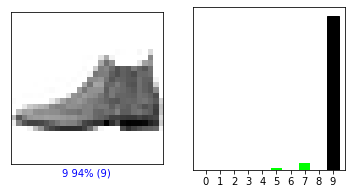

<Figure size 432x288 with 0 Axes>

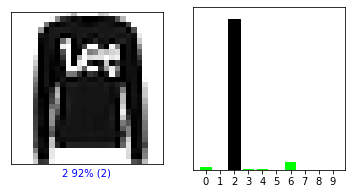

<Figure size 432x288 with 0 Axes>

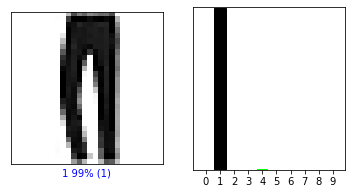

<Figure size 432x288 with 0 Axes>

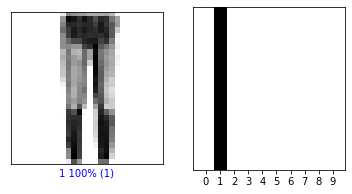

<Figure size 432x288 with 0 Axes>

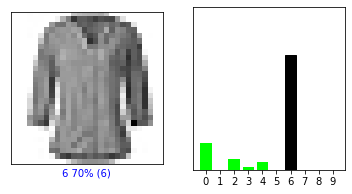

<Figure size 432x288 with 0 Axes>

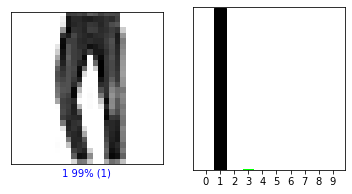

<Figure size 432x288 with 0 Axes>

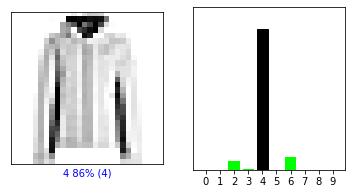

<Figure size 432x288 with 0 Axes>

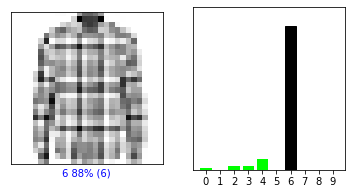

<Figure size 432x288 with 0 Axes>

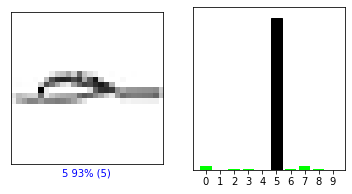

<Figure size 432x288 with 0 Axes>

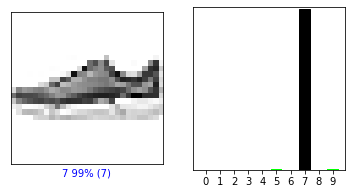

<Figure size 432x288 with 0 Axes>

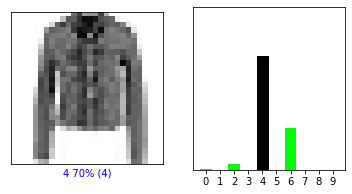

<Figure size 432x288 with 0 Axes>

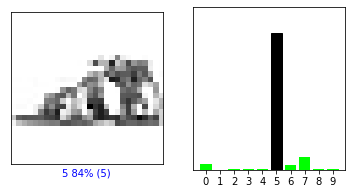

<Figure size 432x288 with 0 Axes>

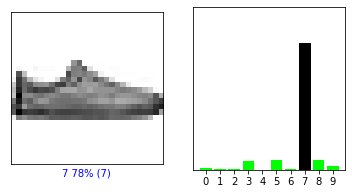

<Figure size 432x288 with 0 Axes>

In [62]:
for i in range(0,13):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictionsc[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictionsc[i],  test_labels)
  plt.show()
  plt.clf()

Con una pérdida muy baja y con una precisión muy alta, vemos que hace buenas predicciones, hasta podemos decir que llega a superar al tercer caso, pero solo antes de las 15 épocas, en estas es un muy buen entrenamiento, a partir de la 15 empieza a sobreentrenarse, hay que observar como suben los valores. 

# Utilizando Callbacks

Un callback herramienta que actua sobre el comportamiento de un modelo de Keras durante el entrenamiento o evaluacion incluyendo Existen de diferentes como tf.keras.callbacks.TensorBoard, donde se pueden sacar y mirarel progreso del entrenamiento y los resultados, o tf.keras.callbacks.ModelCheckpoint donde el modelo es automáticamente guardado durante el entrenamiento, entre otros.

In [9]:
from keras.callbacks import ModelCheckpoint



En este caso utilizaremos el Model Checkpoint que permite determinar dónde controlar el peso, cómo debe ser este y bajo que circumstancias controlarlo. 

Creamos un nuevo modelo, en este caso, hemos utilizado el caso dos de esta práctica. 

In [10]:
mode = Sequential()
mode.add(Conv2D(64, (7, 7), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
mode.add(MaxPooling2D((2, 2)))
mode.add(Conv2D(128,(3,3), strides=(1,1), activation='relu'))
mode.add(MaxPooling2D((2, 2)))
mode.add(Flatten())
mode.add(Dense(65, activation='relu'))
mode.add(Dense(10, activation='softmax'))

In [11]:
mode.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
C='/tmp/checkpoint'
mode_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=C,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [21]:
mode.fit(train_images, train_labels, epochs=10, validation_split=0.2, callbacks=[mode_callback])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3496 - accuracy: 0.8736 - val_loss: 0.3601 - val_accuracy: 0.8721
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3375 - accuracy: 0.8779 - val_loss: 0.3692 - val_accuracy: 0.8624
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3258 - accuracy: 0.8821 - val_loss: 0.3488 - val_accuracy: 0.8749
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3165 - accuracy: 0.8849 - val_loss: 0.3306 - val_accuracy: 0.8813
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3072 - accuracy: 0.8887 - val_loss: 0.3289 - val_accuracy: 0.8808
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8918 - val_loss: 0.3295 - val_accuracy: 0.8815
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2933 - accuracy: 0.8932 - val_loss: 0.3167 - val_accuracy: